In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.19.0


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
observations = 1000

xs = np.random.uniform(low = -10, high = 10, size = (observations, 1))
zs = np.random.uniform(-10,10, (observations, 1))

generated_inputs = np.column_stack((xs, zs))

noise = np.random.uniform(-1,1,(observations, 1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro', inputs = generated_inputs, targets = generated_targets)

# Solving with Tensorflow

In [19]:
training_data = np.load('TF_intro.npz')

In [21]:
input_size = 2
output_size = 1

model = tf.keras.Sequential([
        tf.keras.layers.Dense(
            output_size,
            kernel_initializer = tf.random_uniform_initializer(minval = -0.1, maxval = 0.1),
            bias_initializer = tf.random_uniform_initializer(-0.1, 0.1)
        )    
])

custom_optimizer = tf.keras.optimizers.SGD(learning_rate = 0.02)

model.compile(optimizer = custom_optimizer, loss = 'mean_squared_error')

model.fit(training_data['inputs'], training_data['targets'], epochs = 100, verbose = 2)

Epoch 1/100
32/32 - 1s - 26ms/step - loss: 33.0208
Epoch 2/100
32/32 - 0s - 2ms/step - loss: 1.1722
Epoch 3/100
32/32 - 0s - 3ms/step - loss: 0.4667
Epoch 4/100
32/32 - 0s - 4ms/step - loss: 0.3891
Epoch 5/100
32/32 - 0s - 5ms/step - loss: 0.3784
Epoch 6/100
32/32 - 0s - 5ms/step - loss: 0.3873
Epoch 7/100
32/32 - 0s - 5ms/step - loss: 0.3962
Epoch 8/100
32/32 - 0s - 3ms/step - loss: 0.4131
Epoch 9/100
32/32 - 0s - 5ms/step - loss: 0.3999
Epoch 10/100
32/32 - 0s - 3ms/step - loss: 0.3813
Epoch 11/100
32/32 - 0s - 3ms/step - loss: 0.3977
Epoch 12/100
32/32 - 0s - 3ms/step - loss: 0.4080
Epoch 13/100
32/32 - 0s - 3ms/step - loss: 0.4610
Epoch 14/100
32/32 - 0s - 3ms/step - loss: 0.3889
Epoch 15/100
32/32 - 0s - 3ms/step - loss: 0.4237
Epoch 16/100
32/32 - 0s - 3ms/step - loss: 0.3822
Epoch 17/100
32/32 - 0s - 3ms/step - loss: 0.4123
Epoch 18/100
32/32 - 0s - 2ms/step - loss: 0.3870
Epoch 19/100
32/32 - 0s - 3ms/step - loss: 0.4100
Epoch 20/100
32/32 - 0s - 4ms/step - loss: 0.3807
Epoch 2

# Extract the weights

In [24]:
model.layers[0].get_weights()

[array([[ 2.0532107],
        [-2.9952955]], dtype=float32),
 array([5.033623], dtype=float32)]

In [26]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 2.0532107],
       [-2.9952955]], dtype=float32)

In [30]:
biases = model.layers[0].get_weights()[1]
biases

array([5.033623], dtype=float32)

# Extract the outputs

In [33]:
model.predict_on_batch(training_data['inputs']).round(1)

array([[ 20.2],
       [ 44.4],
       [ 17.4],
       [ -9.8],
       [-25.8],
       [ 25.7],
       [  6.6],
       [ 14.4],
       [-10.6],
       [  7.3],
       [ 13.2],
       [ -2.2],
       [-27.5],
       [ 19.2],
       [ 20.9],
       [ 40.5],
       [ 25. ],
       [-14.9],
       [  3.4],
       [ 12.5],
       [ -2.4],
       [-27.5],
       [-22.8],
       [ 41.3],
       [ 20.3],
       [ 13.4],
       [ -6.3],
       [ 13. ],
       [-26.7],
       [ 21. ],
       [  1.9],
       [  1.4],
       [  6.2],
       [ 16.1],
       [ 10.3],
       [-13. ],
       [ 18.6],
       [-27.6],
       [-13.5],
       [-38.6],
       [ 47.6],
       [-15.4],
       [  1.3],
       [ 29.2],
       [-13.7],
       [ 27.5],
       [ -7.9],
       [ 19.2],
       [  8.3],
       [-16.1],
       [ -2.1],
       [ 33.1],
       [-34.3],
       [  1.2],
       [  1.9],
       [ -5.6],
       [  3.2],
       [ 15.4],
       [-19.4],
       [-19.8],
       [ 14.5],
       [-23.8],
       [

In [35]:
training_data['targets'].round(1)

array([[ 19.5],
       [ 43.4],
       [ 16. ],
       [ -9.9],
       [-25.9],
       [ 25.6],
       [  8. ],
       [ 14.1],
       [-10.7],
       [  7.8],
       [ 14.3],
       [ -3.4],
       [-28.4],
       [ 18.5],
       [ 20.9],
       [ 39.7],
       [ 25.3],
       [-14.5],
       [  4. ],
       [ 13. ],
       [ -1.6],
       [-27.7],
       [-22.7],
       [ 42. ],
       [ 21.5],
       [ 12.8],
       [ -6. ],
       [ 13.1],
       [-26.5],
       [ 20.7],
       [  2.8],
       [  0.9],
       [  6.1],
       [ 15.8],
       [ 10.2],
       [-13. ],
       [ 19.4],
       [-27.3],
       [-13.9],
       [-37.8],
       [ 48. ],
       [-15.1],
       [  1.7],
       [ 28.6],
       [-13.2],
       [ 27.4],
       [ -9.1],
       [ 19.8],
       [  8.1],
       [-15.7],
       [ -2.1],
       [ 32.1],
       [-34.2],
       [  1.1],
       [  2.2],
       [ -6.1],
       [  3.3],
       [ 16.8],
       [-19.5],
       [-19.2],
       [ 14.4],
       [-23.8],
       [

# Plotting the data

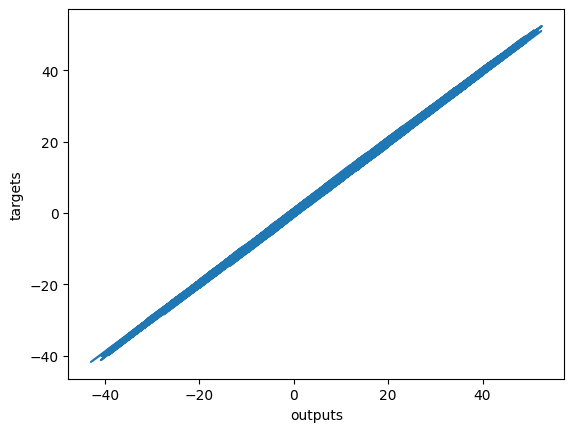

In [38]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()